In [1]:
#importing pandas
import pandas as pd

In [2]:
#steps in ML
# 1. Loading dataset
# 2. Preprocessing dataset (handling missing values etc)
# 3. Dividing dataset into training and testing
# 4. Training ML model with train dataset
# 5. Testing the result 
# 6  Predicting for testing dataset

In [3]:
#loading dataset
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Child'],
      dtype='object')

In [6]:
#after removing extra columns
df=df[["Survived","Pclass","Sex","Age","SibSp","Embarked","Child"]]

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,female,38.0,1,C,0
1,1,1,female,35.0,1,S,0
2,0,1,male,54.0,0,S,0
3,1,3,female,4.0,1,S,1
4,1,1,female,58.0,0,S,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Embarked  183 non-null    object 
 6   Child     183 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.1+ KB


In [9]:
#convert object into numeric data- Compulsory for all columns to be in numeric form
#Label encoder- It is used to create labels in the columns
#Sklearn library- The library for traditional ML and preproceeing such as Encoding, Normalisation, Standardisation

In [10]:
from sklearn import preprocessing

In [11]:
#le is instance here for the below function 
le=preprocessing.LabelEncoder()

In [12]:
#encoding column sex and embarked
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,0,38.0,1,0,0
1,1,1,0,35.0,1,2,0
2,0,1,1,54.0,0,2,0
3,1,3,0,4.0,1,2,1
4,1,1,0,58.0,0,2,0


0 for female, 1 for male 

C=0, S=2

In [14]:
# dataset into input and output variables
# X for input y for output
X=df.drop("Survived",axis=1)  #axis 1 for column and 0 for row
y=df["Survived"]

In [15]:
# Splitting dataset
# Train data- for traning the model || Test data- for evaluating the model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train_test_split will convert our data to train set and test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
#here 80% data is training dta and 20% data of dataset is test data

X_train,y_train will train our model

X_test,y_test will test our model

In [18]:
#KNN

KNN- K nearest neighbours 
so basically this algo calculates distance of an unknown point (that needs to be predicted) from the k nearest neighbours of the two groups independently and will assign the point to the nearest group found.

It is also known as lazy learning algo as it needs the point that needs to be predicted

Simplest classifier model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# training dataset
model=KNeighborsClassifier(n_neighbors=3)   #let k=3 here
model.fit(X_train, y_train)   #model_fit: for training model

KNeighborsClassifier(n_neighbors=3)

In [21]:
X_train.shape

(146, 6)

In [22]:
y_train.shape

(146,)

In [23]:
# Testing the KNN model
y_predicted=model.predict(X_test)   #mode.predict: for predicting using trained model

In [24]:
# Evaluation of model

We will caculate the accuracy score agains y_test

y_test is the ground truth value || 
y_predicted is the predicted value we got from model

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
# syntax of accuracy_score is accuracy_score(predicted,ground value)
accuracy_score(y_predicted,y_test)*100

72.97297297297297

The accurracy found here from KNN model (k=3) is 72% approx.

Each time we are getting different accuracy because it is randomly picking train and test datasets

Overfitting and underfitting

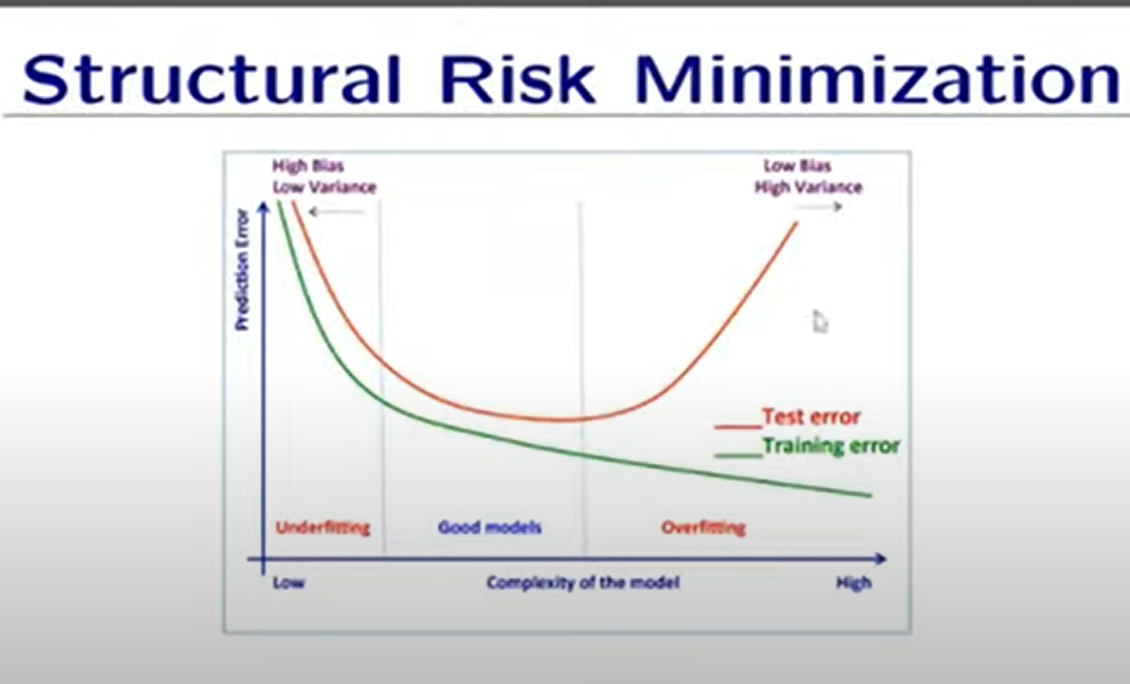

Cross validation- Used to basically avoid the issues of overfitting and generalise model well. An average score of how our model is performing on dataset.

In [27]:
# syntax of cross-validation - cross_val_score(model-name,input-features,output-feature,no. of folds)

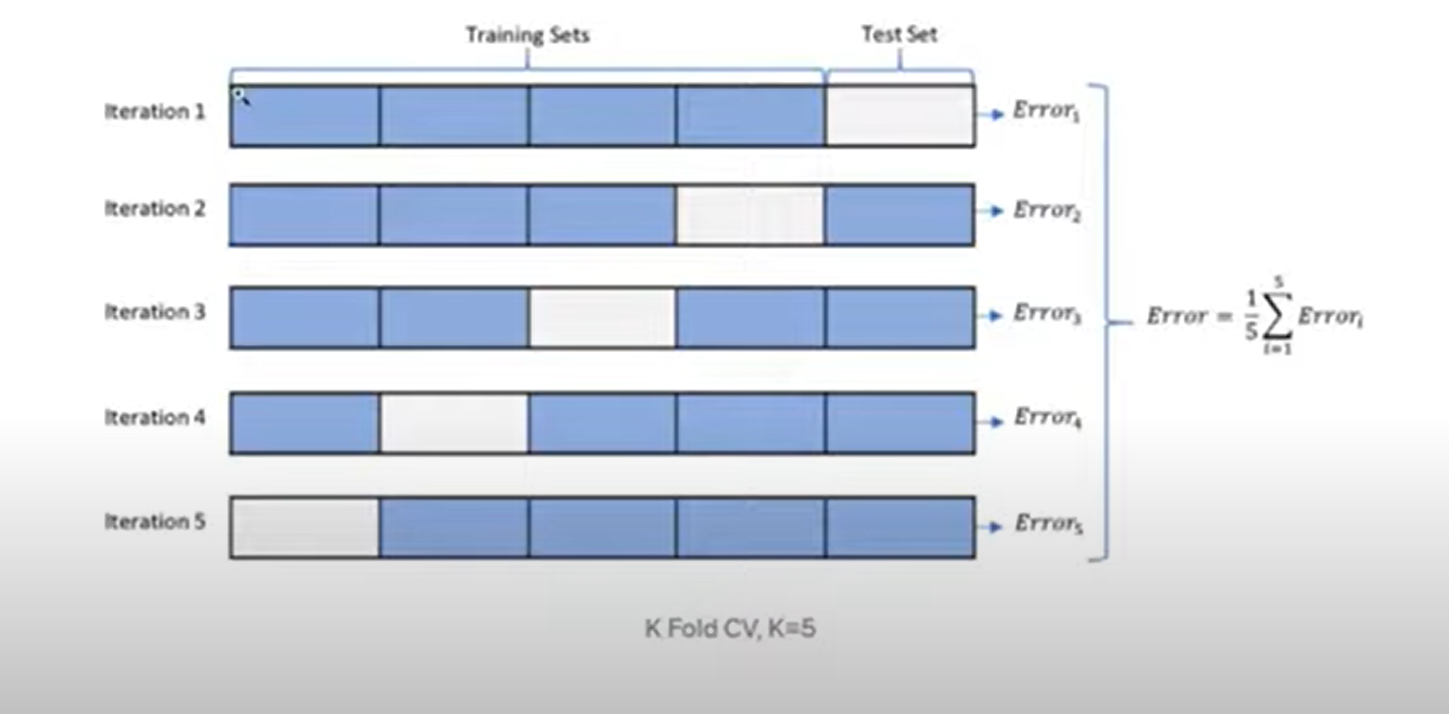

In [28]:
#importing cross-validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=10)

In [29]:
print(scores)

[0.53333333 0.6        0.6        0.8        0.73333333 0.53333333
 0.78571429 0.64285714 0.64285714 0.64285714]


In [30]:
print("Average accuracy of the model: ",scores.mean()*100)

Average accuracy of the model:  65.14285714285715


In [31]:
# How to decide value of k (n_neighbors) for KNN model?
# random checking for k=1 to 10

for i in range(1,11):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_predicted=model.predict(X_test)
  print(accuracy_score(y_test,y_predicted))

0.6216216216216216
0.5675675675675675
0.7297297297297297
0.7567567567567568
0.8108108108108109
0.7567567567567568
0.7837837837837838
0.7297297297297297
0.7297297297297297
0.7027027027027027


In [32]:
# we will display the k value vs accuracy score for each k
# for that creating two lists for comparison

k=[]
accuracy=[]

In [33]:
for i in range(1,11):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_predicted=model.predict(X_test)
  acc=accuracy_score(y_test,y_predicted)
  k.append(i)
  accuracy.append(acc)

In [36]:
# we will display the k value vs accuracy score for each k

In [34]:
#1st value(X-axis)
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
#2nd value(Y-axis)
accuracy

[0.6216216216216216,
 0.5675675675675675,
 0.7297297297297297,
 0.7567567567567568,
 0.8108108108108109,
 0.7567567567567568,
 0.7837837837837838,
 0.7297297297297297,
 0.7297297297297297,
 0.7027027027027027]

In [37]:
#plotting work
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


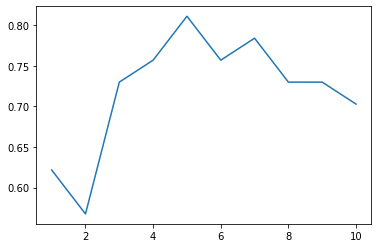

In [38]:
sns.lineplot(k,accuracy)

Our model performed best when k=5

In [39]:
# Now computing cross validation on whole dataset (k=5)
model=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model,X,y,cv=10)   #let folds=10

In [40]:
scores

array([0.84210526, 0.68421053, 0.52631579, 0.72222222, 0.72222222,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667])

In [41]:
scores.mean()*100

68.30409356725147

In [49]:
## findout best value of k by combining cross-validation as well
for i in range (1,11):
  model=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(model,X,y,cv=10)
  #suggestion- keep value of cv between 5 to 10 for better accuracy
  # heigher the value of cv you will get more prcise accuracy
  print(scores.mean())

0.7315789473684211
0.6008771929824561
0.6994152046783626
0.6175438596491227
0.6830409356725147
0.6385964912280702
0.6830409356725146
0.6546783625730994
0.7263157894736841
0.6821637426900584


Our model will perform on an average best when the value of k is 1

Class Imbalance: When one class is present in minority the problem is known as class imbalance.

This problem arises Whenever the label distribution which we are going to predict is less than 60:40

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


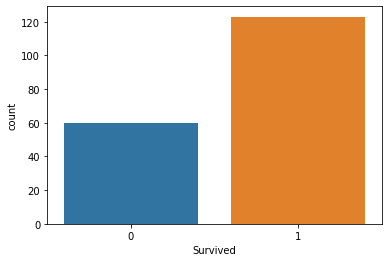

In [55]:
#eg- one predicted value is biasing here 
sns.countplot(df["Survived"])
# or sns.countplot(x="Survived",data=df)

In [56]:
# Explanation further for class imbalance problem

In [57]:
# loading dataset
telecom=pd.read_csv("telecom_churn.csv")

In [58]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
# churn column need to be converted into int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
telecom["Churn"]=le.fit_transform(telecom["Churn"])

In [60]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [61]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [62]:
#features extraction
X=telecom[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']]
y=telecom["Churn"]

In [63]:
#splitting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(accuracy_score(y_predicted,y_test)*100)

87.25637181409296


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


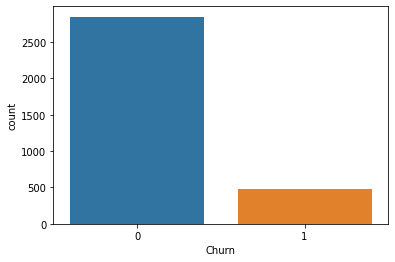

In [67]:
sns.countplot(telecom["Churn"])

In [68]:
#here the model predicted value 87% which excites but it is a biased prediction

The ML model will learn that for every input feature the output should be 0 because of the numerous training examples for 0. There are not enough training examples for class 1. This problem is said to be class Imbalance problem

In [69]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,